In [1]:
import cooler
import sys
sys.path.append("./code")

import pandas as pd
from ast import literal_eval
import treg_functions
import matplotlib.image as mpimg
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

import scipy, scipy.stats
from hic_zscore_functions import *
from treg_functions import *
from old_make_figures import *
from tad_functions import *
from aux_functions import *

plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [20]:
%load_ext autoreload
%autoreload
import scanpy as sc

sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
PARSED_CHROMS = ['1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '3', '4', '5', '6', '7', '8', '9', 'X']

In [5]:
import aux_functions
from aux_functions import *

In [6]:
import scanpy as sc
sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})
plt.rcParams['axes.grid.which']
sc.settings.verbosity = 4  # verbosity: errors (0), warnings (1), info (2), hints (3)
# warnings.simplefilter(action='ignore', category=FutureWarning)
sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({"axes.grid.axis" : 'both'})
plt.rcParams.update({"axes.grid" : True})
sc.logging.print_header()

plt.rcParams.update({
    'axes.labelsize': 14,       # x and y labels' font size
    'xtick.labelsize': 8,      # x tick labels' font size
    'ytick.labelsize': 8,      # y tick labels' font size
    'axes.titlesize': 14,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'legend.fontsize': 6,      # Legend font size
})
plt.rcParams['pdf.fonttype'] = 42

plt.rcParams.update({
    'axes.labelsize': 8,       # x and y labels' font size
    'xtick.labelsize': 6,      # x tick labels' font size
    'ytick.labelsize': 6,      # y tick labels' font size
    'axes.titlesize': 10,        # Axes title font size
    'patch.linewidth' : .35,
    'lines.linewidth' : .5,
    'xtick.major.pad' : 2,
    'ytick.major.pad' : 2,

})
plt.rcParams['axes.linewidth'] = .25
plt.rcParams['xtick.major.width'] = .25
plt.rcParams['ytick.major.width'] = .25
plt.rcParams['ytick.major.size'] = 2
plt.rcParams['xtick.major.size'] = 2
plt.rcParams['grid.linewidth'] = .25

plt.rcParams['axes.facecolor'] = 'none' # Or any suitable colour...
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'none'

/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Genomic

scanpy==1.9.4 anndata==0.9.2 umap==0.5.3 numpy==1.24.4 scipy==1.11.2 pandas==2.1.0 scikit-learn==1.3.0 statsmodels==0.14.0 igraph==0.10.6 pynndescent==0.5.10


/Genomics/argo/users/gdolsten/.conda/envs/mamba/envs/new_3dgenome/lib/python3.10/site-packages/umap/umap_.py:660: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [7]:
adata = sc.read_h5ad('./final_chipseq_adata/FINAL_adata_updated')

#### Make figures

UMAP of enhancers

Distribution of bins in megaloops

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
import scanpy as sc
sc.settings.set_figure_params(dpi=80, color_map='coolwarm', frameon=True)

#### Fraction of anchors intersecting TSS

### Getting clusterpairs

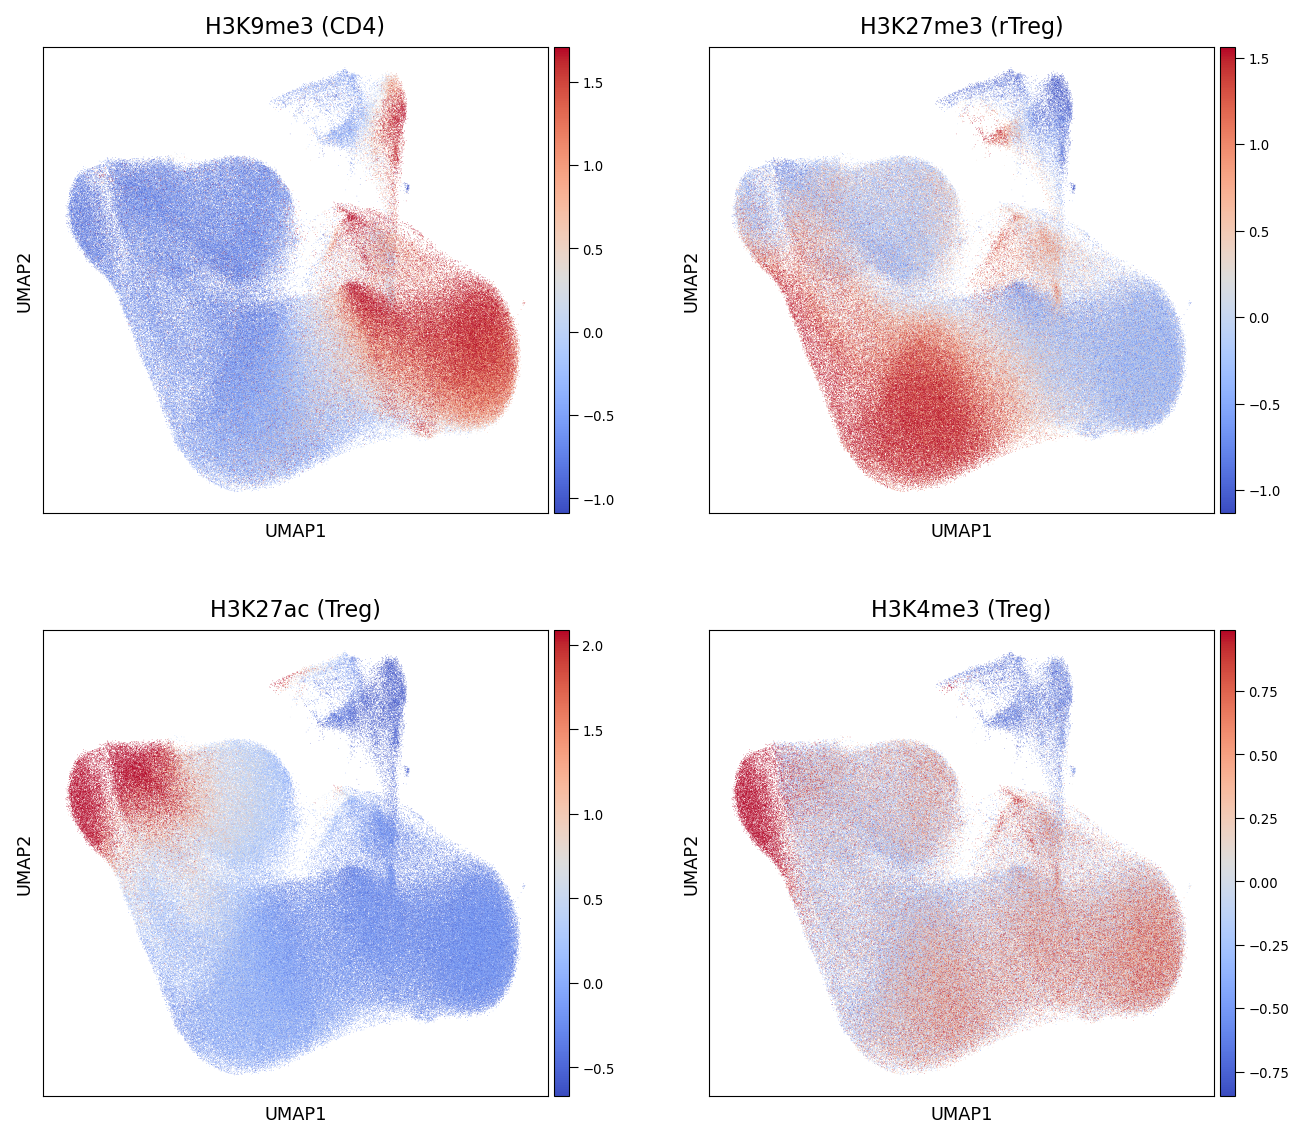

In [14]:
fig = sc.pl.umap(adata,
           color = [#'anchor', 
                    '_H3K9me3_WT__Mus_musculus__ChIP-Seq', 
                    '_rTreg_H3K27me3_ChIP_Rep2__Mus_musculus__ChIP-Seq',
                    'H3K27ac_ChIP-seq_of_Treg_replicate_2', 'H3K4me3_ChIP-seq_of_Treg'],
           title = [
               'H3K9me3 (CD4)', 'H3K27me3 (rTreg)', 'H3K27ac (Treg)', 'H3K4me3 (Treg)'],
           vmin = ['p05', 'p05', 'p05', 'p05'],
           vmax = ['p95', 'p95', 'p95', 'p95'],
           cmap = 'coolwarm',
           wspace = .2,
           ncols=2,
           return_fig=True                 
          )
fig.savefig('./plots/FINAL_ENHANCER_UMAP/HISTONES.pdf', bbox_inches = 'tight')

In [485]:
fig = sc.pl.umap(adata, color=['metaloop_anchors_in_ancs', 
                        'all_ancs_thresh=0.75',
                        ], vmin=-1, vmax=1,
                 title = ['Metaloops', 'Loops'],
            wspace = .2,
           ncols=2,
           return_fig=True                 
)
fig.savefig('./plots/FINAL_ENHANCER_UMAP/metaloops.pdf', bbox_inches = 'tight')

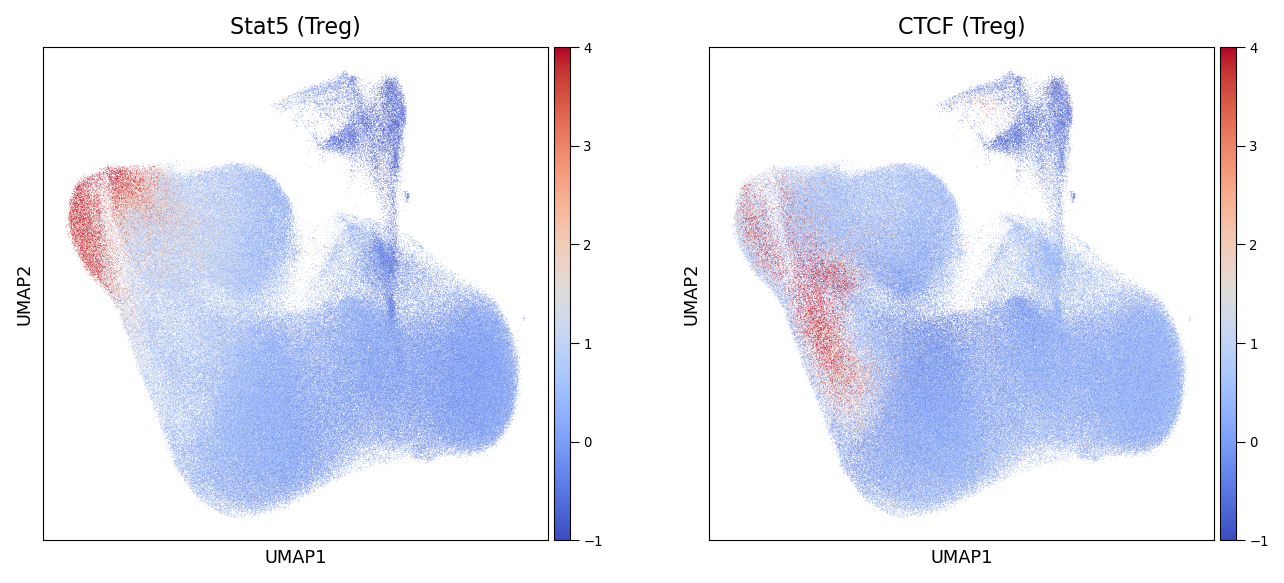

In [463]:
fig = sc.pl.umap(adata, color=['901R3a_Stat5ChIP_Treg_periphery_WT_rep3', 'Treg_CTCF_ChIP',
                        ], vmin=-1, vmax=[4, 4],
                 title = ['Stat5 (Treg)', 'CTCF (Treg)'],
            wspace = .2,
           ncols=2,
           return_fig=True                 
)
fig.savefig('./plots/FINAL_ENHANCER_UMAP/stat5_ctcf_chip.pdf', bbox_inches = 'tight')



### Megaloops

In [469]:
%autoreload 2
from processAdata import *

def aggregate_chip_over_megaloop_sites(sites):
    # tmp_adata = adata[sites].copy()
    # tmp_adata.X = scipy.stats.zscore(tmp_adata.X, axis=0)
    
    tmp_delta_df, (tmp_m1, tmp_m2) = adata_calculate_differences_in_enhancer_subsets(
                                    adata, 
                                    (adata.obs['all_ancs_thresh=0'] > 0) & (adata.obs['metaloop_anchors'] > 0),
                                    (adata.obs['all_ancs_thresh=0'] > 0) & (adata.obs['metaloop_anchors'] <= 0), 
                                    uplabel='Higher in\nTreg anchors',
                                    downlabel='Higher in\nTcon anchors',
                                    zscore = False
                            )
    
    tmp_v1 = pd.DataFrame(tmp_m1.X, columns = tmp_m1.var.index)
    tmp_v2 = pd.DataFrame(tmp_m2.X, columns = tmp_m2.var.index)

    median_df = (tmp_v1.mean() - tmp_v2.mean()).sort_values()
    median_df = median_df[(adata.var['celltype']=='Tcon') | (adata.var['celltype']=='CD4')  | (adata.var['celltype']=='Treg') 
                            | (adata.var['factor']=='H3K9me3') | (adata.var['factor']=='Treg Prec.')
                         ]

    return median_df, tmp_v1, tmp_v2


sites = (adata.obs['all_ancs_thresh=0'] > 0) | (adata.obs['metaloop_anchors'] > 0)
median_df, vals_anc, vals_mega = aggregate_chip_over_megaloop_sites(sites)

/Genomics/pritykinlab/gabe/jupys/tregs/./code/processAdata.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_df['Experiment'][delta_df.index.isin(outliers)] = 'No'


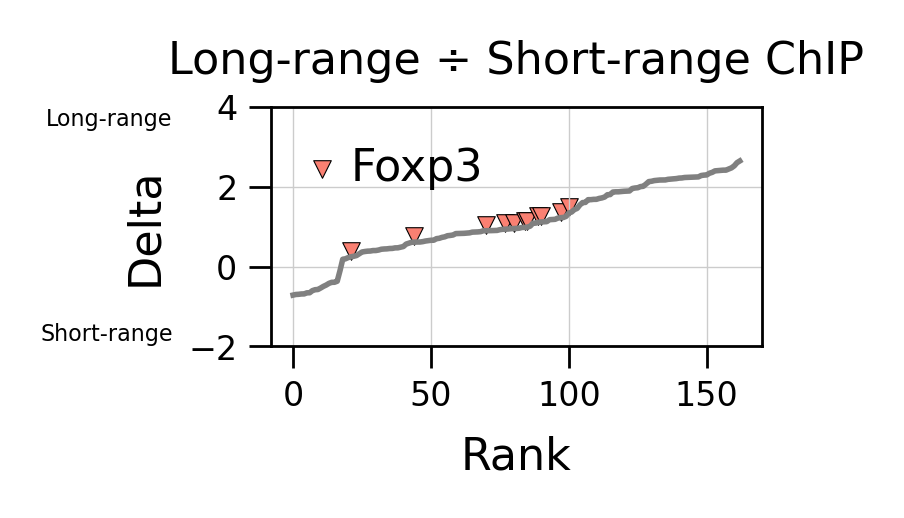

In [470]:
from processAdata import *

def plot_chip_curve(median_df, adata):
    xs, ys = np.arange(len(median_df)), median_df.values
    plt.figure(figsize=(40*mm, 20*mm), dpi = 200)
    plt.plot(xs, ys, linewidth=1, color='gray')
    idx = np.where(median_df.index.isin(adata.var.index[adata.var['factor']=='Foxp3']))
    for i in idx:
        plt.scatter(xs[idx], ys[idx] + .15, marker='v', s=10, color='salmon', label='Foxp3', edgecolor='black', linewidth=.2)
    plt.ylabel("Delta")
    plt.xlabel("Rank")
    plt.legend(bbox_to_anchor=(0, 1), loc='upper left', frameon=False, fontsize=8)
    add_yaxis_labels("Short-range", "Long-range", plt.gca(), fontsize=4, x = -.2)
    plt.title("Long-range ÷ Short-range ChIP", fontsize=8)
    plt.ylim(-2, 4)
    plt.gcf().savefig('./plots/FINAL_CHIP_PLOTS/chip_lineplot.pdf', bbox_inches='tight')

plot_chip_curve(median_df, adata)

CD4_Tcell_CTCF_ChIP Ctcf
_mTr_H3K27me3_rep2__Sample_49___Mus_musculus__ChIP-Seq H3K27me3
Smc1a_ChIP-seq_of_Treg Smc1
_H3K9me3_WT__Mus_musculus__ChIP-Seq H3K9me3


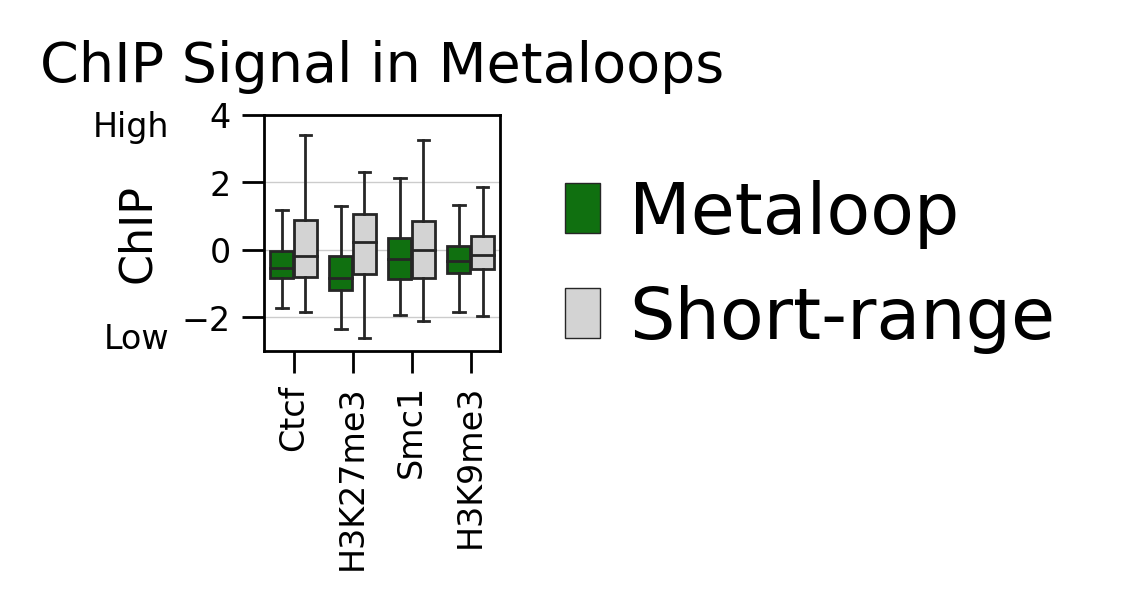

In [471]:
fetch_and_plot_top_N(vals_anc, vals_mega, median_df, method='bottom', N=4, ylim=[-3, 4],
                    yticks=[-2, 0, 2, 4], label='down')

H3K4me3_ChIP-seq_of_tTreg H3K4me3
903C1_Tet2ChIP_Tconv_periphery_WT_rep1 Tet2
001c_H3K27acChIP_Treg_periphery_WT_rep3 H3K27ac
901C1_Stat5ChIP_Tconv_periphery_WT_rep1 Stat5
CREB_ChIP-seq_of_Treg CREB


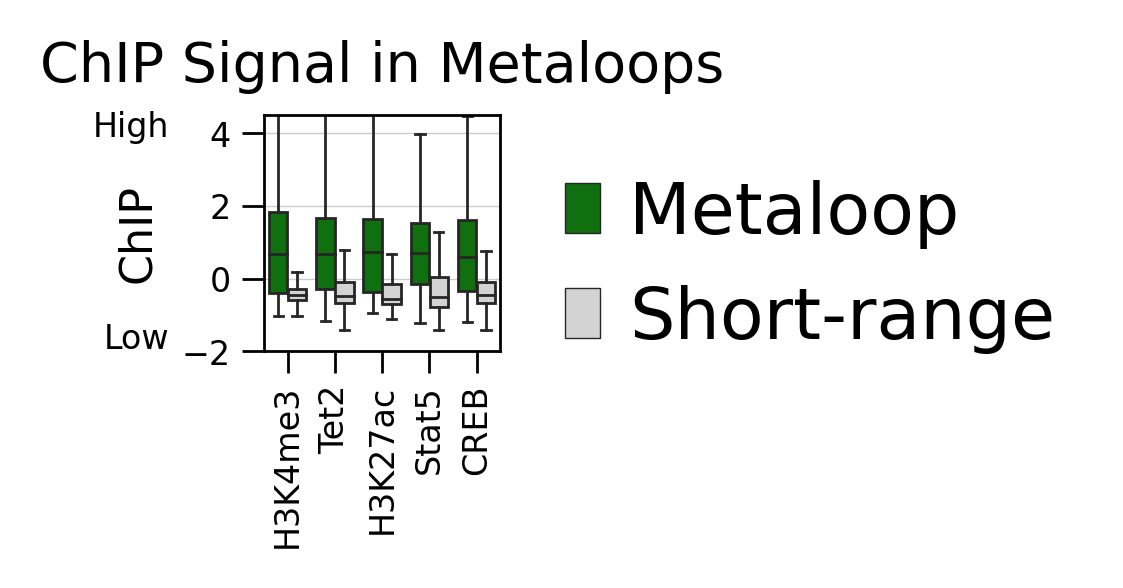

In [472]:
fetch_and_plot_top_N(vals_anc, vals_mega, median_df, method='top', N=5, ylim=[-2, 4.5],
                    yticks=[-2, 0, 2, 4], label='up')

In [473]:
def fetch_and_plot_top_N(vals1, vals2, median_df, method='top', N=4, ylim=[-3, 4], yticks=None, label='up'):
    
    all_inds = []
    down_set = set()
    if method == 'top':
        indices = median_df.index[::-1]
    elif method == 'bottom':
        indices = median_df.index[:-10]
    for i in indices:
        expt = adata.var.loc[i, 'factor']
        if expt =='ATAC':
            continue
        if expt in down_set:
            pass
        else:
            all_inds.append(i)
            down_set.add(expt)
        if len(down_set) == N:
            break
    v1 = vals1[all_inds]
    v2 = vals2[all_inds]
    both = pd.concat([v1, v2], axis=0)
    mu = both.mean()
    sig = both.std()

    v1 = (v1 - mu) / sig
    v2 = (v2 - mu) / sig
    melt1 = v1.melt()
    melt2 = v2.melt()
    
    melt1['Anchors'] = 'Metaloop'
    melt2['Anchors'] = 'Short-range'
    
    melt = pd.concat([melt1, melt2], axis=0)
    fig, axs = init_subplots_exact(1, 1, fgsz=(15*mm, 15*mm), dpi = 200)
    sns.boxplot(data=melt, x='variable', y='value', hue='Anchors', palette=['green', 'lightgray'], showfliers=False)
    plt.xticks(rotation=90)
    axs.set_axisbelow(True)
    v = pd.Series([x.get_text() for x in axs.get_xticklabels()])
    v.index = v.values
    
    
    new_ticklabels = []
    for ticklabel in axs.get_xticklabels():
        name = ticklabel.get_text()
        celltype = adata.var.loc[name, 'celltype']
        expt = adata.var.loc[name, 'factor']
        new_ticklabels.append(expt)
        print(name, expt)
        # ticklabel.set_color(celltype_to_color[celltype])
    axs.set_xticklabels(new_ticklabels)
    plt.xlabel("")
    plt.ylabel("ChIP")
    plt.title("ChIP Signal in Metaloops")
    plt.legend(bbox_to_anchor=(1, 1), loc=('upper left'), frameon=False)
    plt.ylim(ylim)
    plt.yticks(yticks)
    add_yaxis_labels('Low', 'High', axs, fontsize=6, x=-.4)
    fig.savefig(f'./plots/FINAL_CHIP_PLOTS/{label}_chip_boxplot.pdf', bbox_inches='tight')
    

In [14]:
def aggregate_chip_over_loop_sites(adata):
    tmp_delta_df, (tmp_m1, tmp_m2) = adata_calculate_differences_in_enhancer_subsets(
                                    adata, 
                                    (adata.obs['all_ancs_thresh=0'] > 0),
                                    (adata.obs['all_ancs_thresh=0'] == 0), 
                                    uplabel='Higher in\nTreg anchors',
                                    downlabel='Higher in\nNS anchors',
                            )
    tmp_v1 = pd.DataFrame(tmp_m1.X, columns = tmp_m1.var.index)
    tmp_v2 = pd.DataFrame(tmp_m2.X, columns = tmp_m2.var.index)

    mean_df = (tmp_v1.mean() - tmp_v2.mean()).sort_values()
    mean_df = mean_df[(adata.var['celltype']=='Tcon') | (adata.var['celltype']=='CD4')  | (adata.var['celltype']=='Treg') 
                            | (adata.var['factor']=='H3K9me3') | (adata.var['factor']=='Treg Prec.')
                         ]

    return mean_df, tmp_v1, tmp_v2

In [15]:
from processAdata import *

median_df, vals_loop, vals_noloop = aggregate_chip_over_loop_sites(adata)

/Genomics/pritykinlab/gabe/jupys/tregs/./code/processAdata.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_df['Experiment'][delta_df.index.isin(outliers)] = 'No'


In [18]:
def plot_chip_curve_loops(median_df, adata):
    xs, ys = np.arange(len(median_df)), median_df.values
    plt.figure(figsize=(40*mm, 20*mm), dpi = 200)
    plt.plot(xs, ys, linewidth=1, color='gray')
    idx = np.where(median_df.index.isin(adata.var.index[adata.var['factor']=='Foxp3']))
    for i in idx:
        plt.scatter(xs[idx], ys[idx] + .2, marker='v', s=10, color='salmon', label='Foxp3', edgecolor='black', linewidth=.2,
                   zorder=3)
    
    
    idx = np.where(median_df.index.isin(adata.var.index[adata.var['factor']=='Ctcf']))
    for i in idx:
        plt.scatter(xs[idx]-5, ys[idx], marker=(3, 0, 3*90), s=10, color='blue', label='CTCF', edgecolor='black', linewidth=.2)
    
    idx = np.where(median_df.index.isin(adata.var.index[adata.var['factor']=='Smc1']))
    for i in idx:
        plt.scatter(xs[idx]-5, ys[idx], marker=(3, 0, 3*90), s=10, color='lightblue', label='Smc1', edgecolor='black', linewidth=.2,
                   zorder=3)
    
    idx = np.where(median_df.index.isin(adata.var.index[adata.var['factor']=='Stat5']))
    for i in idx:
        plt.scatter(xs[idx]-5, ys[idx]+.175, marker='v', s=10, color='green', label='Stat5', edgecolor='black', linewidth=.2,
                   zorder=3)
    
    plt.ylabel("Delta")
    plt.xlabel("Rank")
    plt.legend(bbox_to_anchor=(1, 0), loc='lower left', frameon=False)
    add_yaxis_labels("No loop", "Short-range loop", plt.gca(), fontsize=4, x = -.2)
    plt.title("Looping ChIP enrichment", fontsize=8)
    plt.ylim(-1, 3)
    plt.gcf().savefig('./plots/paper/s21/loop_chip_lineplot.pdf', bbox_inches='tight')

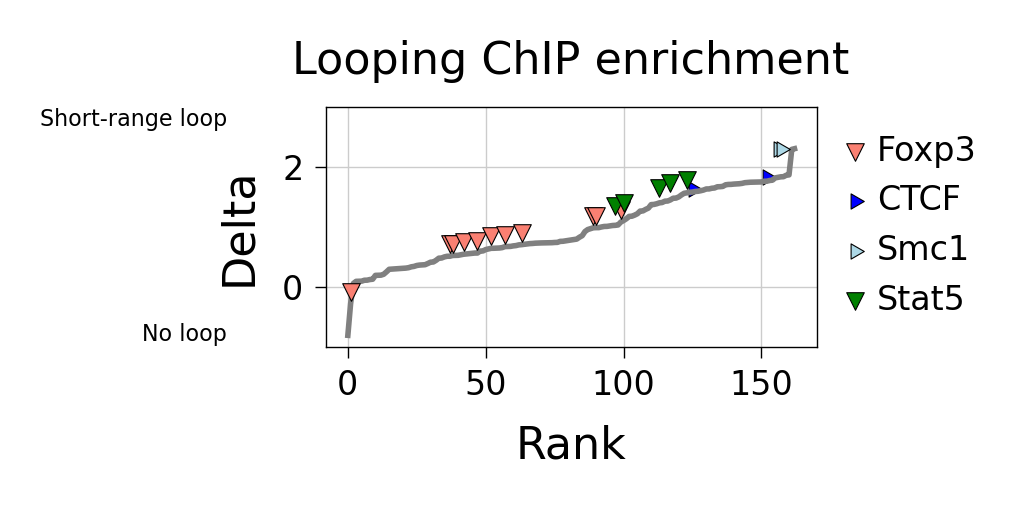

In [21]:
plot_chip_curve_loops(median_df, adata)

### ChIP enrichment Treg vs. Tcon

In [478]:
from processAdata import *
def aggregate_chip_treg_tcon(adata):
    # sites = (adata.obs['treg_ancs_thresh=0'] > 0) | (adata.obs['tcon_ancs_thresh=0'] > 0)
    # tmp = adata[sites].copy()
    # tmp.X = scipy.stats.zscore(tmp.X, axis=0)
    tmp_delta_df, (tmp_m1, tmp_m2) = adata_calculate_differences_in_enhancer_subsets(
                                    adata, 
                                    (adata.obs['treg_ancs_thresh=0'] > 0) & (adata.obs['tcon_ancs_thresh=0'] == 0),
                                    (adata.obs['tcon_ancs_thresh=0'] > 0) & (adata.obs['treg_ancs_thresh=0'] == 0), 
                                    uplabel='Higher in\nTreg anchors',
                                    downlabel='Higher in\nTcon anchors',
                            )
    
    tmp_v1 = pd.DataFrame(tmp_m1.X, columns = tmp_m1.var.index)
    tmp_v2 = pd.DataFrame(tmp_m2.X, columns = tmp_m2.var.index)

    mean_df = (tmp_v1.mean() - tmp_v2.mean()).sort_values()
    mean_df = mean_df[(adata.var['celltype']=='Tcon') | (adata.var['celltype']=='CD4')  | (adata.var['celltype']=='Treg') 
                            | (adata.var['factor']=='H3K9me3') | (adata.var['factor']=='Treg Prec.')
                         ]

    
    return mean_df, tmp_v1, tmp_v2

In [479]:
median_df, vals_treg, vals_tcon = aggregate_chip_treg_tcon(adata)

/Genomics/pritykinlab/gabe/jupys/tregs/./code/processAdata.py:231: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  delta_df['Experiment'][delta_df.index.isin(outliers)] = 'No'


In [481]:
def plot_line_curve_treg_tcon_chip(median_df, ):
    xs, ys = np.arange(len(median_df)), median_df.values
    plt.figure(figsize=(40*mm, 20*mm), dpi = 200)
    plt.plot(xs, ys, linewidth=1, color='gray')
    
    factors = ['Foxp3', 'Ctcf', 'Smc1', 'Stat5']
    colors = ['salmon', 'blue', 'lightblue', 'green', 'purple', 'lightgreen']
    for c, factor in enumerate(factors):
        idx = np.where(median_df.index.isin(adata.var.index[adata.var['factor']==factor]))
        for i in idx:
            for tmpi in i:
                cell = adata.var.loc[median_df.index[tmpi]]['celltype']
                if cell == "Treg":
                    plt.scatter(xs[tmpi], ys[tmpi] - .1, marker='^', s=10, color=colors[c], edgecolor='black', linewidth=.2, zorder=3)
                else:
                    plt.scatter(xs[tmpi], ys[tmpi] + .2, marker='v', s=10, color=colors[c], edgecolor='black', linewidth=.2, zorder=3)
            plt.scatter([], [], marker='o', s=10, color=colors[c], edgecolor='black', linewidth=.2, zorder=3, label=factor)
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
    
    plt.scatter([], [], marker='^', s=10, color='black', edgecolor='black', linewidth=.2, zorder=3, label="Treg")
    plt.scatter([], [], marker='v', s=10, color='black', edgecolor='black', linewidth=.2, zorder=3, label="Tcon")
    plt.legend(bbox_to_anchor=(1, 1), loc='upper left', frameon=False)
    
    plt.ylabel("Delta")
    plt.xlabel("Rank")
    add_yaxis_labels("Tcon loops", "Treg loops", plt.gca(), fontsize=4, x = -.2)
    plt.title("Treg Loop enrichment", fontsize=8)
    plt.ylim(-1, 1)
    plt.gcf().savefig('./plots/paper/s31/loop_chip_enrichment.pdf', bbox_inches='tight')

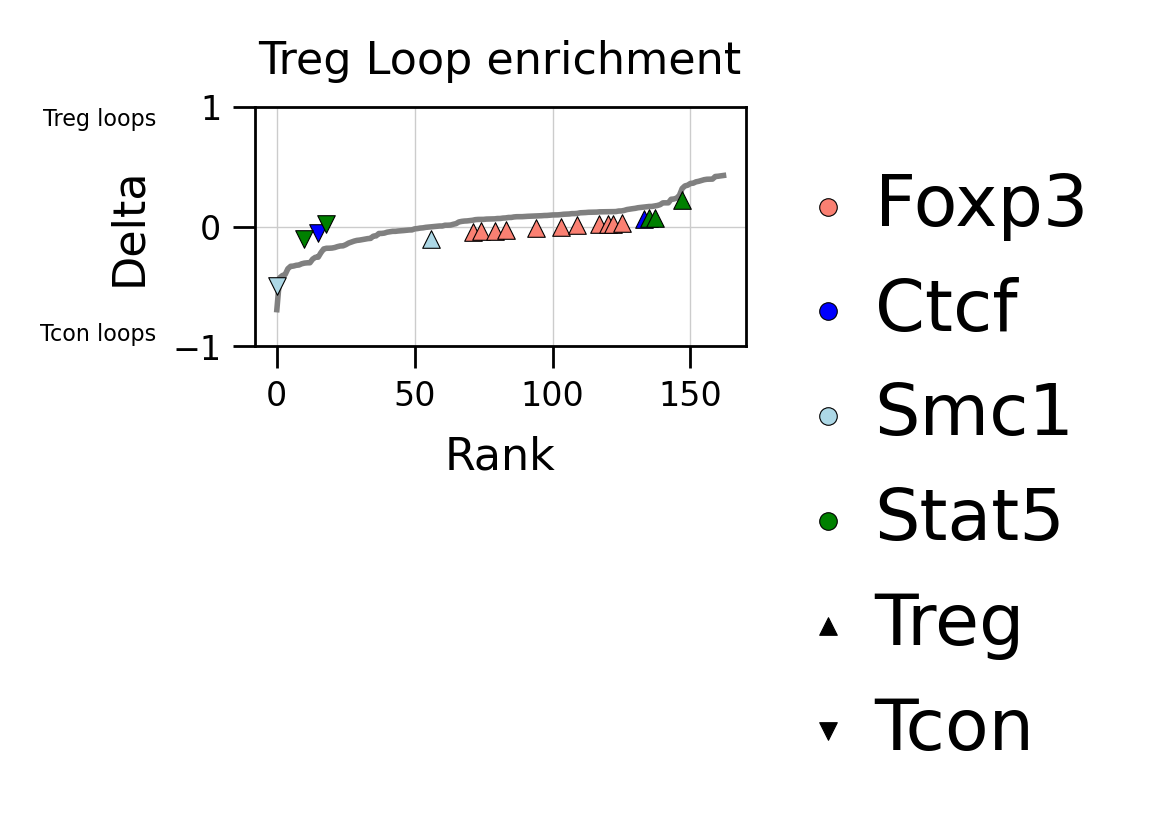

In [482]:
plot_line_curve_treg_tcon_chip(median_df)